## 4. Visualize Data

[Data Science Playlist on YouTube](https://www.youtube.com/watch?v=w97CsaLuEvI&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy)
[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience04.png)](https://www.youtube.com/watch?v=w97CsaLuEvI&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy "Python Data Science")

In addition to summary statistics, data visualization helps to understand the data characteristics and how different variables are related.

![analyze](https://apmonitor.com/che263/uploads/Begin_Python/analyze.png)

There are many examples of data visualization with [Matplotlib](https://matplotlib.org/gallery/index.html), [Seaborn](https://seaborn.pydata.org/examples/index.html), and [Plotly](https://plot.ly/python/). In this tutorial, we go through a few examples for showing:

- time series: line
- correlated variables: scatter, pair plot
- data distributions: bar, box, violin, distribution, joint plot

Each plot is shown with one of the graphing packages. Matplotlib is a base-level Python package, Seaborn is uses matplotlib and automates more complex plots, and Plotly creates engaging interactive plots.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Generate Data

Run the next cell to:

- Generate `n` linearly spaced values betweeen `0` and `n-1` with `np.linspace(start,end,count)`
- Select random samples from a uniform distribution between 0 and 1 with `np.random.rand(count)`
- Select random samples from a normal (Gaussian) distribution with `np.random.normal(mean,std,count)`
- Create a time series that changes based on `y[i]*0.1` staying within the range `-3` to `3`
- Combine `tt`, `x`, `y`, and `z` with a vertical stack `np.vstack` and transpose `.T` for column oriented data
- Create pandas DataFrame with columns `tt`, `x`, `y`, and `z`

In [3]:
import numpy as np
import pandas as pd
np.random.seed(0) # change seed for different answer
n = 1000
tt = np.linspace(0,n-1,n)
x = np.random.rand(n)+tt/500
y = np.random.normal(0,x,n)
z = [0]
for i in range(1,n):
    z.append(min(max(-3,z[i-1]+y[i]*0.1),3))
data = pd.DataFrame(np.vstack((tt,x,y,z)).T,\
                    columns=['time','x','y','z'])
data['w'] = '0-499'
for i in range(int(n/2),n):
    data.at[i,'w'] = '500-999'
data.head()

,time,x,y,z,w
0,0.0,0.548814,-0.055813,0.000000,0-499
1,1.0,0.717189,0.013827,0.001383,0-499
2,2.0,0.606763,1.122264,0.113609,0-499
3,3.0,0.550883,-0.117981,0.101811,0-499
4,4.0,0.431655,-0.215403,0.080271,0-499


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Plot

A line plot is the most basic type. There is an introductory tutorial on plots in the [Begin Python Course, Lesson 12](https://github.com/APMonitor/begin_python/blob/master/12.%20Plotting.ipynb). Visit that course module if you need additional information on basic plots such as `plt.plot()`

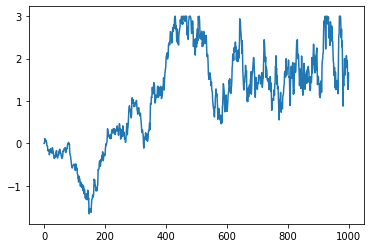

In [4]:
plt.plot(tt,z)
plt.show()

The line plot can also be improved with customized trend styles. Below is an example with common options.

**c=Colors**

    =============    ===============================
    character        color
    =============    ===============================
    ``'b'``          blue
    ``'g'``          green
    ``'r'``          red
    ``'y'``          yellow
    ``'k'``          black
    =============    ===============================

**m=Markers**

    =============    ===============================
    character        description
    =============    ===============================
    ``'.'``          point marker
    ``'o'``          circle marker
    ``'s'``          square marker
    ``'^'``          triangle marker
    ``'*'``          star marker
    =============    ===============================

**ln=Line Styles**

    =============    ===============================
    character        description
    =============    ===============================
    ``'-'``          solid line style
    ``'--'``         dashed line style
    ``'-.'``         dash-dot line style
    ``':'``          dotted line style
    =============    ===============================

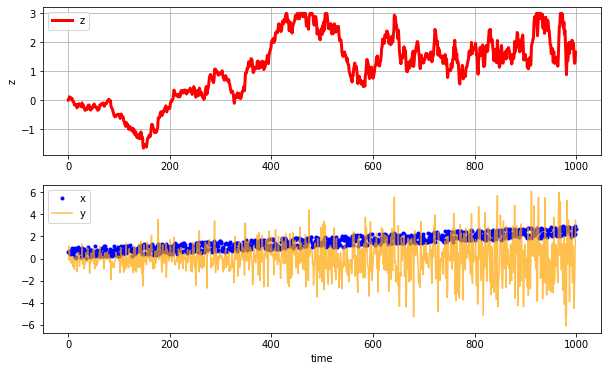

In [5]:
plt.figure(1,figsize=(10,6))                         # adjust figure size
ax=plt.subplot(2,1,1)                                # subplot 1
plt.plot(tt,z,'r-',linewidth=3,label='z')            # plot red line
ax.grid()                                            # add grid
plt.ylabel('z'); plt.legend()                        # add ylabel, legend
plt.subplot(2,1,2)                                   # subplot 2
plt.plot(tt,x,'b.',label='x')                        # plot blue dots
plt.plot(tt,y,color='orange',label='y',alpha=0.7)    # plot orange line
plt.xlabel('time'); plt.legend()                      # labels
plt.savefig('04-myFig.png',transparent=True,dpi=600) # save figure
plt.show()                                           # show plot

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Plot Activity

Create a plot that displays the data:

```python
xt = [0,0.1,0.2,0.3,0.5,0.8,1.0]
yt = [1.0,2.1,3.5,6.5,7.2,5.9,6.3]
```

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Scatter Plot

Scatter plots are similar to regular plots but they show individuals points instead of values connected in series. Matplotlib and Plotly are used in this example. Matplotlib is fast and simple while Plotly has features for interactive plots.

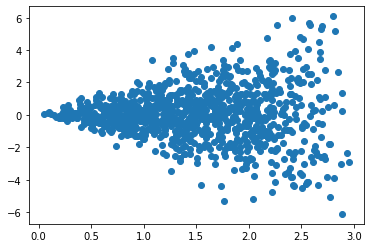

In [6]:
# matplotlib
plt.scatter(x,y)
plt.show()

In [7]:
# plotly
fig = px.scatter(data,x='x',y='y',color='w',size='x',hover_data=['w'])
fig.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Scatter Plot Activity

Create a scatter plot with `matplotlib` or `plotly` that displays `xt` paired with `yt` and `zt`:

```python
xt = np.array([0,0.1,0.2,0.3,0.5,0.8,1.0])
yt = np.array([1.0,2.1,3.5,6.5,7.2,5.9,6.3])
zt = xt*yt
```

Change the shape of the points to a square for `yt` and a triangle for `zt`. Add a label to indicate which points are `yt` and `zt`.

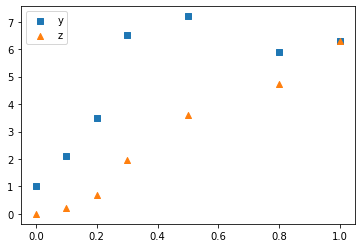

In [16]:
xt = np.array([0,0.1,0.2,0.3,0.5,0.8,1.0])
yt = np.array([1.0,2.1,3.5,6.5,7.2,5.9,6.3])
zt = xt*yt

plt.scatter(xt,yt, marker='s',label="y")
plt.scatter(xt, zt, marker="^",label="z")
plt.legend()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Bar Chart

Bar charts show a histogram distribution of count in a bin range. The `alpha` option is the transparency between `0` and `1`. A value of `0.7` is a good value to use to show the overlying and underlying data.

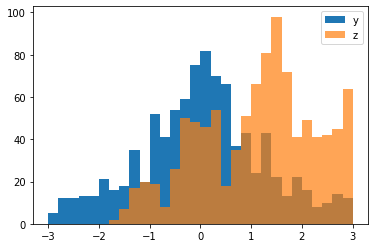

In [17]:
bins = np.linspace(-3,3,31)
plt.hist(y,bins,label='y')
plt.hist(z,bins,alpha=0.7,label='z')
plt.legend()
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Bar Plot Activity

Create a bar plot that displays the distribution of `xt`, `yt`, and `zt`:

```python
nt = 1000
xt = np.random.rand(nt)
yt = np.random.normal(0,1,nt)
zt = xt*yt
```

Use `bins = np.linspace(-3,3,31)` to create the histogram distrubtion.

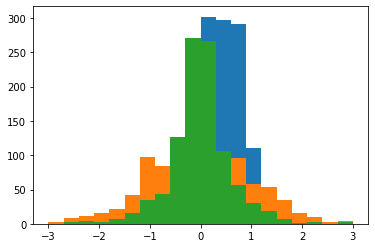

In [21]:
nt = 1000
xt = np.random.rand(nt)
yt = np.random.normal(0,1,nt)
zt = xt*yt
bins = np.linspace(-3,3,21)

plt.hist(xt,bins)
plt.hist(yt,bins)
plt.hist(zt,bins)
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Pair Plot

A pair plot shows the correlation between variables. It has bar distributions on the diagonal and scatter plots on the off-diagonal. A pair plot also shows a different color (`hue`) by category `w`. Pair plots show correlations between pairs of variables that may be related and gives a good indication of features (explanatory inputs) that are used for classification or regression.

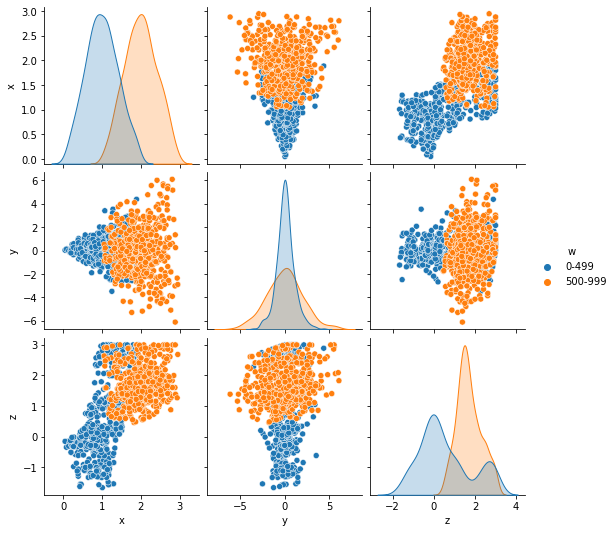

In [22]:
sns.pairplot(data[['x','y','z','w']],hue=('w'))
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Pair Plot Activity

Create a pair plot that displays the correlation between `xt`, `yt`, and `zt` between the first 500 and second 500 random numbers that are categorized as `Dist`. Create a `pandas` dataframe with:

```python
nt = 100
xt = np.random.rand(nt)
yt = np.random.normal(0,1,nt)
zt = xt*yt
dt = pd.DataFrame(np.column_stack([xt,yt,zt]),columns=['xt','yt','zt'])
dt['Dist'] = 'First'
for i in range(int(nt/2),nt):
    dt.at[i,'Dist'] = 'Second'
```

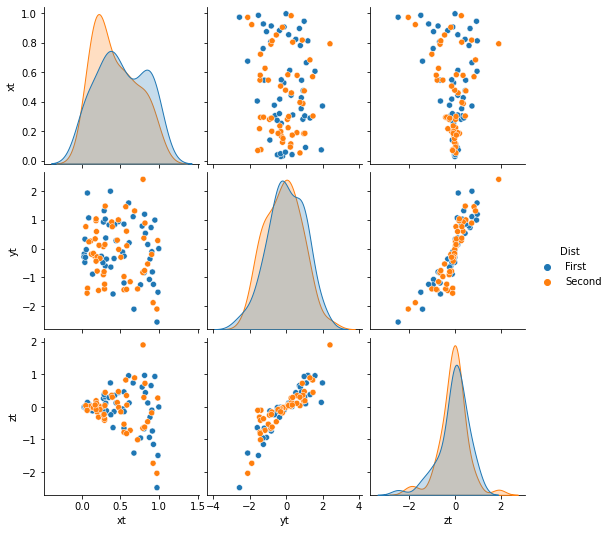

In [27]:
nt = 100
xt = np.random.rand(nt)
yt = np.random.normal(0,1,nt)
zt = xt*yt
dt = pd.DataFrame(np.column_stack([xt,yt,zt]),columns=['xt','yt','zt'])
dt['Dist'] = 'First'
for i in range(int(nt/2),nt):
    dt.at[i,'Dist'] = 'Second'

sns.pairplot(dt[['xt','yt','zt', 'Dist']],hue=('Dist'))
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Box Plot

A box plot shows data quartiles. In this case, we are comparing the first 500 points with the last 500 points.

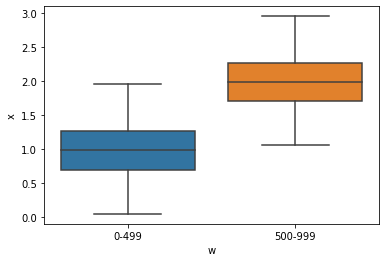

In [28]:
sns.boxplot(x='w',y='x',data=data)
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Box Plot Activity

Create a box plot that shows the quartiles of `yt` by first and second sets as indicated in `Dist`.

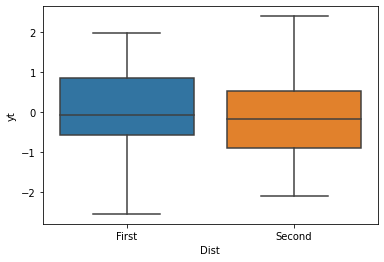

In [29]:
sns.boxplot(x='Dist',y='yt',data=dt)
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Violin Plot

A voilin plot combines the box plot quartiles with the distribution.

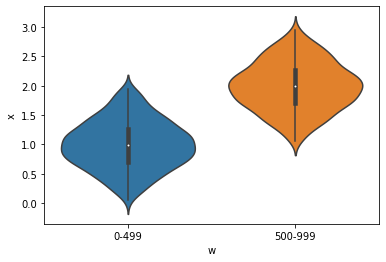

In [30]:
sns.violinplot(x='w',y='x',data=data,size=6)
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Violin Plot Activity

Create a violin plot that shows the quartiles and distribution of `zt` by first and second sets as indicated in `Dist` in the DataFrame `dt`.

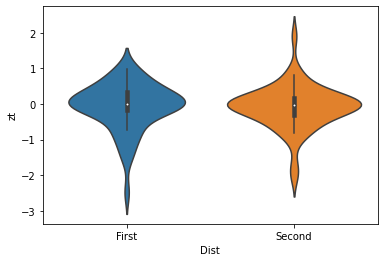

In [31]:
sns.violinplot(x='Dist',y='zt',data=dt,size=6)
plt.show()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Joint Plot

A joint plot shows two variables, with the univariate and joint distributions. Try `kind='reg'`, `'kde'`, and `'hex'` to see different joint plot styles.

/home/curtis/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



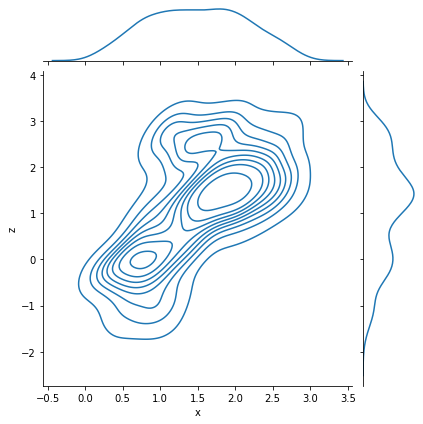

In [32]:
sns.jointplot('x','z',data=data,kind="kde")
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Joint Plot Activity

Create a joint plot that shows the joint distribution of `yt` and `zt` in the DataFrame `dt`.

/home/curtis/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



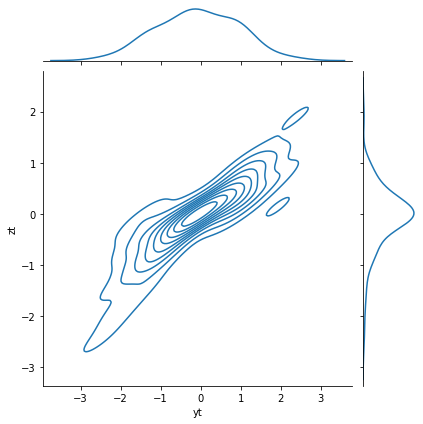

In [33]:
sns.jointplot('yt','zt',data=dt,kind="kde")
plt.show()

### TCLab Activity

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Generate or Retrieve Data 

![connections](https://apmonitor.com/che263/uploads/Begin_Python/connections.png)

A sample data file loads if you do not have a TCLab connected. Otherwise, generate a file from the TCLab data with seconds (`t`), heater levels (`Q1` and `Q2`), and temperatures (`lab.T1` and `lab.T2`). Record data every second for 120 seconds and change the heater levels every 30 seconds to a random number between 0 and 80 with `np.random.randint()`. There is no need to change this program, only run it to collect the data over 2 minutes. 

In [34]:
import tclab, time, csv
import numpy as np
try:
    n = 120 
    with open('04-tclab.csv',mode='w',newline='') as f:
        cw = csv.writer(f)
        cw.writerow(['Time','Q1','Q2','T1','T2'])
        with tclab.TCLab() as lab:
            print('t Q1 Q2 T1    T2')
            for t in range(n):
                if t%30==0:
                    Q1 = np.random.randint(0,81)
                    Q2 = np.random.randint(0,81)
                    lab.Q1(Q1); lab.Q2(Q2)
                cw.writerow([t,Q1,Q2,lab.T1,lab.T2])
                if t%5==0:
                    print(t,Q1,Q2,lab.T1,lab.T2)
                time.sleep(1)
    data4=pd.read_csv('04-tclab.csv')
except:
    print('Connect TCLab to generate data')
    url = 'http://apmonitor.com/do/uploads/Main/tclab_dyn_data2.txt'
    data4=pd.read_csv(url)
    data4.columns = ['Time','Q1','Q2','T1','T2']
    
data4.head()    

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/ttyACM1 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
t Q1 Q2 T1    T2
0 48 53 23.477 22.993
5 48 53 23.541 23.09
10 48 53 24.121 23.509
15 48 53 24.733 23.638
20 48 53 25.41 23.896
25 48 53 26.377 24.508
30 69 56 27.344 25.249
35 69 56 28.311 25.732
40 69 56 29.6 26.506
45 69 56 30.889 27.118
50 69 56 32.178 27.602
55 69 56 33.467 28.697
60 59 29 35.078 29.148
65 59 29 36.367 29.793
70 59 29 37.656 30.599
75 59 29 38.945 31.082
80 59 29 39.912 31.63
85 59 29 40.976 32.339
90 2 30 42.168 32.693
95 2 30 43.135 33.338
100 2 30 43.779 33.66
105 2 30 44.102 33.789
110 2 30 43.908 34.305
115 2 30 43.779 34.788
TCLab disconnected successfully.


,Time,Q1,Q2,T1,T2
0,0,48,53,23.477,22.896
1,1,48,53,23.477,22.832
2,2,48,53,23.444,23.025
3,3,48,53,23.444,22.735
4,4,48,53,23.509,23.025


### Graphical Analysis

Analyze `Q1`, `Q2`, `T1`, and `T2` graphically with a time series plot and a pair plot. The time series plot should show `Q1` and `Q2` in the upper subplot and `T1` and `T2` in the lower subplot. The pair plot should be a `2x2` plot grid that shows the heater / temperature pairs as `Q1`/`T1`, `Q2`/`T2`. 

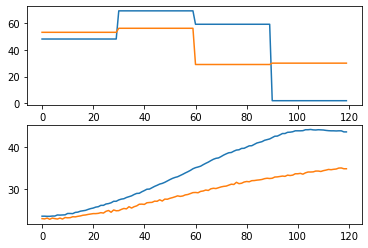

In [39]:
plt.subplots(2,1)
plt.subplot(2,1,1)
plt.plot(data4['Time'], data4['Q1'])
plt.plot(data4['Time'], data4['Q2'])

plt.subplot(2,1,2)
plt.plot(data4['Time'], data4['T1'])
plt.plot(data4['Time'], data4['T2'])

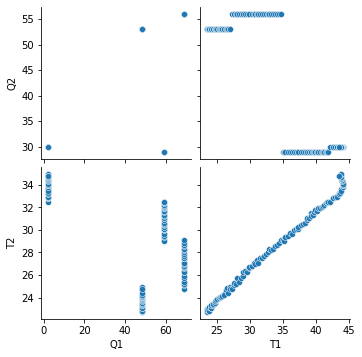

In [40]:
sns.pairplot(data4, x_vars=['Q1','T1'], y_vars=['Q2','T2'])